### My Aesthetics Imports
* see Mike X Cohen Master Math by Coding sympy notebooks

In [46]:
import sympy as sym
from IPython.display import display, Math
sym.init_printing()

In [47]:
mu, alpha, sigma = sym.symbols('mu, alpha, sigma')

In [48]:
expression = sym.exp( (mu-alpha)**2 / (2*sigma**2) )

In [50]:
display(expression);

In [27]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

### Build a one-column matrix

In [9]:
import numpy as np
vector = np.array([1,2,3,4,5])
row_vector = vector.reshape((5,1))
column_vector = vector.reshape((1,5))
single_feature_matrix = vector.reshape((1,5))

In [10]:
vector

array([1, 2, 3, 4, 5])

In [11]:
column_vector

array([[1, 2, 3, 4, 5]])

In [12]:
single_feature_matrix

array([[1, 2, 3, 4, 5]])

In [13]:
multiple_feature_matrix = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]])
multiple_feature_matrix

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [14]:
all_zeros = np.zeros((5,3)) 
all_ones = np.ones((5,3))
print(all_zeros)
print(all_ones)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [15]:
"""For single predictors, the outcome variable y is also a vector. In NumPy, you just set it up as a
generic vector or as a column vector"""
y = np.array([1,2,3,4,5]).reshape((5,1))
y

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [16]:
# Download & import Boston & California housing datasets
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
boston = load_boston()
california = fetch_california_housing()

In [17]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [18]:
# Instruct the Notebook to represent any graphic output in the Notebook itself
%matplotlib inline

In [19]:
# Create DataFrame with Boston housing dataset
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

#### Probability Density Function (PDF)
Calculate different value distributions with the mean & variance using the PDF

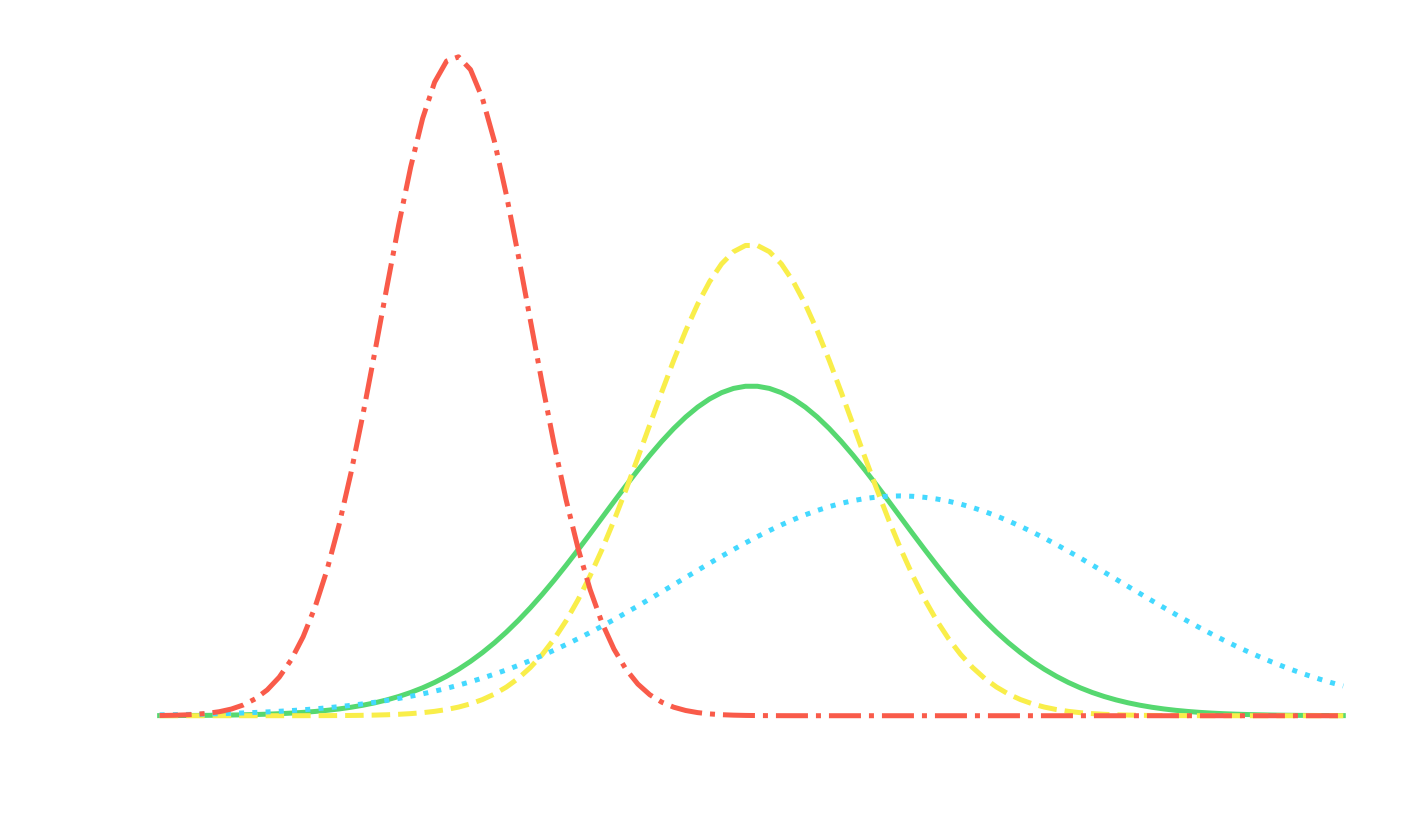

In [32]:
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.mlab as mlab
"""mlab.normpdf is deprecated"""
import math
from scipy.stats import norm

x = np.linspace(-4, 4, 100)
for mean, variance in [(0, 1), (0, 0.7), (1, 1.5), (-2, 0.5)]:
    plt.plot(x, norm.pdf(x, mean, variance))
plt.show();

In [33]:
# Calculate the mean of the 506 Boston tracts

mean_expected_value = dataset['target'].mean()
mean_expected_value

22.532806324110698

In [34]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
np.mean(dataset['target'])

22.532806324110698

In [38]:
# Calculate the squared sum of errors
Squared_errors = pd.Series(mean_expected_value - dataset['target'])**2
SSE = np.sum(Squared_errors)
print('Sum of Squared Errors (SSE): %01.f' % SSE)

Sum of Squared Errors (SSE): 42716


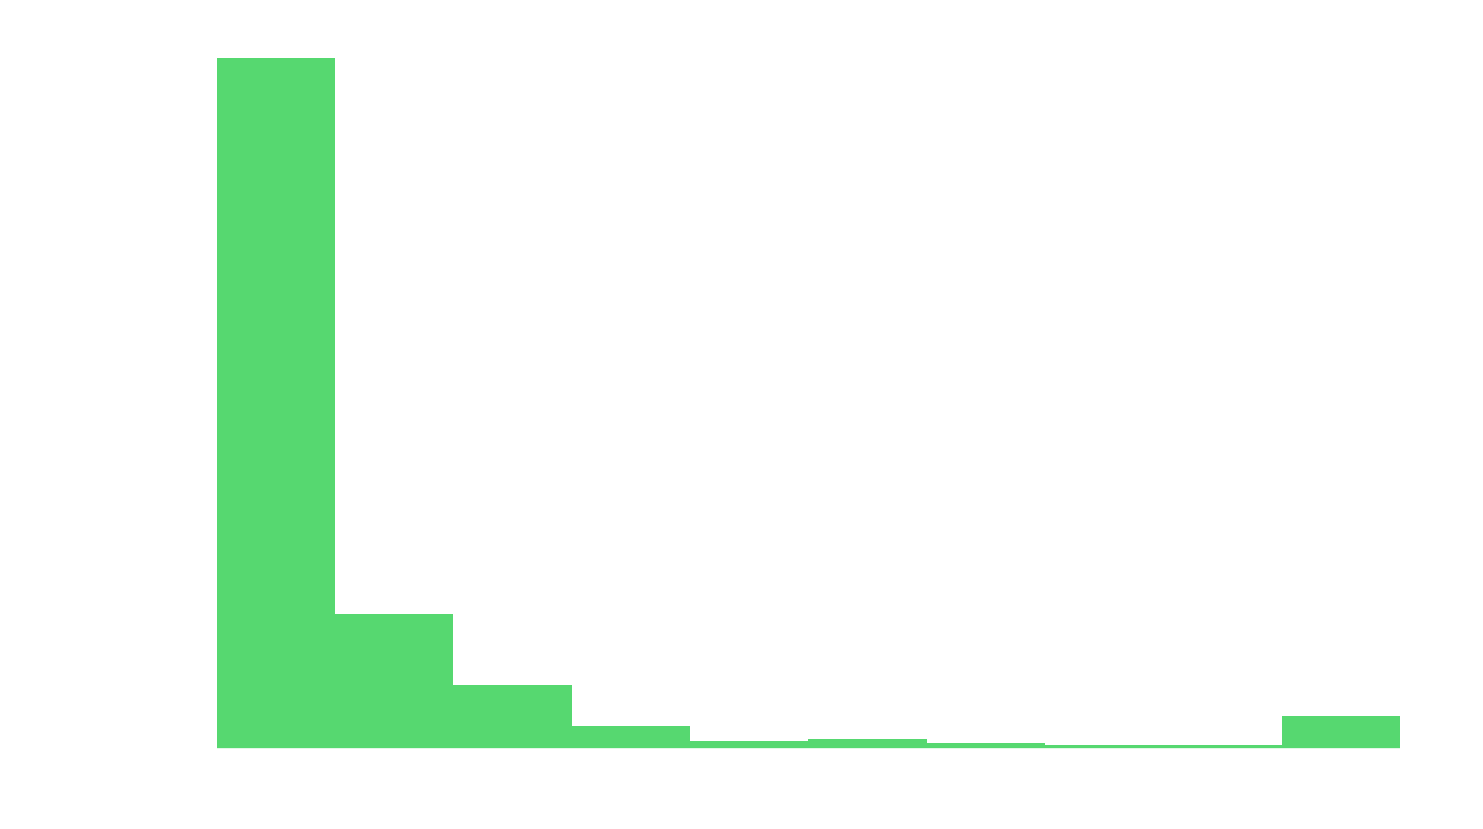

In [39]:
density_plot = Squared_errors.plot(kind='hist')

In [41]:
# Standardize a variable
def standardize(x):
    return (x - np.mean(x))/np.std(x)

In [42]:
# Define covariance function
def covariance(variable_1, variable_2, bias=0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2)))/(observations - min(bias, 1))

In [43]:
# Define Standardize function
def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

In [44]:
# Define correlation function
def correlation(var1, var2, bias=0):
    return covariance(standardize(var1), standardize(var2), bias)

In [45]:
from scipy.stats.stats import pearsonr
print('Our correlation estimation: %0.5f' % (correlation(dataset['RM'], dataset['target'])))
print('Correlation from Scipy pearsonr estimation: %0.5f' % pearsonr(dataset['RM'], dataset['target']) [0])

Our correlation estimation: 0.69536
Correlation from Scipy pearsonr estimation: 0.69536
